Q5. Write a program to find the largest correlation spot in the given image (hills.jpg) using 
linear filtering- based template matching technique. Draw rectangular bounding box at the 
detected template (template.png) matched locations. (Use hills.jpeg, template.png images) 

In [1]:
# Importing all the necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

(225, 225, 3)
(126, 84, 3)


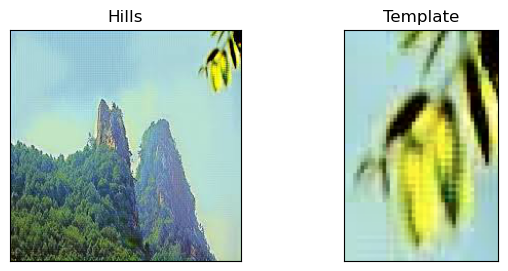

In [2]:
img_1 = cv2.imread("hills.jpeg") # Reading hill.jpeg
img_2 = cv2.imread('template.png') # Reading template.png
img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB) # converting bgr to rgb for plotting purpose
img_2 = cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB)
print(img_1.shape),print(img_2.shape)

# plotting hills.jpeg and template 
plt.figure(figsize=(7,3))
plt.subplot(1,2,1)
plt.title("Hills")
plt.imshow(img_1)
plt.xticks([])
plt.yticks([])

plt.subplot(1,2,2)
plt.title("Template")
plt.imshow(img_2)
plt.xticks([])
plt.yticks([])

plt.show()

https://docs.opencv.org/3.4/df/dfb/group__imgproc__object.html

**TM_SQDIFF- Template Matching Squared difference**
<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mi>R</mi>
  <mo stretchy="false">(</mo>
  <mi>x</mi>
  <mo>,</mo>
  <mi>y</mi>
  <mo stretchy="false">)</mo>
  <mo>=</mo>
  <munder>
    <mo>&#x2211;<!-- ∑ --></mo>
    <mrow class="MJX-TeXAtom-ORD">
      <msup>
        <mi>x</mi>
        <mo>&#x2032;</mo>
      </msup>
      <mo>,</mo>
      <msup>
        <mi>y</mi>
        <mo>&#x2032;</mo>
      </msup>
    </mrow>
  </munder>
  <mo stretchy="false">(</mo>
  <mi>T</mi>
  <mo stretchy="false">(</mo>
  <msup>
    <mi>x</mi>
    <mo>&#x2032;</mo>
  </msup>
  <mo>,</mo>
  <msup>
    <mi>y</mi>
    <mo>&#x2032;</mo>
  </msup>
  <mo stretchy="false">)</mo>
  <mo>&#x2212;<!-- − --></mo>
  <mi>I</mi>
  <mo stretchy="false">(</mo>
  <mi>x</mi>
  <mo>+</mo>
  <msup>
    <mi>x</mi>
    <mo>&#x2032;</mo>
  </msup>
  <mo>,</mo>
  <mi>y</mi>
  <mo>+</mo>
  <msup>
    <mi>y</mi>
    <mo>&#x2032;</mo>
  </msup>
  <mo stretchy="false">)</mo>
  <msup>
    <mo stretchy="false">)</mo>
    <mn>2</mn>
  </msup>
</math>



**TM_SQDIFF_NORMED- Template Matching Squared difference normed**

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mi>R</mi>
  <mo stretchy="false">(</mo>
  <mi>x</mi>
  <mo>,</mo>
  <mi>y</mi>
  <mo stretchy="false">)</mo>
  <mo>=</mo>
  <mfrac>
    <mrow>
      <munder>
        <mo>&#x2211;<!-- ∑ --></mo>
        <mrow class="MJX-TeXAtom-ORD">
          <msup>
            <mi>x</mi>
            <mo>&#x2032;</mo>
          </msup>
          <mo>,</mo>
          <msup>
            <mi>y</mi>
            <mo>&#x2032;</mo>
          </msup>
        </mrow>
      </munder>
      <mo stretchy="false">(</mo>
      <mi>T</mi>
      <mo stretchy="false">(</mo>
      <msup>
        <mi>x</mi>
        <mo>&#x2032;</mo>
      </msup>
      <mo>,</mo>
      <msup>
        <mi>y</mi>
        <mo>&#x2032;</mo>
      </msup>
      <mo stretchy="false">)</mo>
      <mo>&#x2212;<!-- − --></mo>
      <mi>I</mi>
      <mo stretchy="false">(</mo>
      <mi>x</mi>
      <mo>+</mo>
      <msup>
        <mi>x</mi>
        <mo>&#x2032;</mo>
      </msup>
      <mo>,</mo>
      <mi>y</mi>
      <mo>+</mo>
      <msup>
        <mi>y</mi>
        <mo>&#x2032;</mo>
      </msup>
      <mo stretchy="false">)</mo>
      <msup>
        <mo stretchy="false">)</mo>
        <mn>2</mn>
      </msup>
    </mrow>
    <msqrt>
      <munder>
        <mo>&#x2211;<!-- ∑ --></mo>
        <mrow class="MJX-TeXAtom-ORD">
          <msup>
            <mi>x</mi>
            <mo>&#x2032;</mo>
          </msup>
          <mo>,</mo>
          <msup>
            <mi>y</mi>
            <mo>&#x2032;</mo>
          </msup>
        </mrow>
      </munder>
      <mi>T</mi>
      <mo stretchy="false">(</mo>
      <msup>
        <mi>x</mi>
        <mo>&#x2032;</mo>
      </msup>
      <mo>,</mo>
      <msup>
        <mi>y</mi>
        <mo>&#x2032;</mo>
      </msup>
      <msup>
        <mo stretchy="false">)</mo>
        <mn>2</mn>
      </msup>
      <mo>&#x22C5;<!-- ⋅ --></mo>
      <munder>
        <mo>&#x2211;<!-- ∑ --></mo>
        <mrow class="MJX-TeXAtom-ORD">
          <msup>
            <mi>x</mi>
            <mo>&#x2032;</mo>
          </msup>
          <mo>,</mo>
          <msup>
            <mi>y</mi>
            <mo>&#x2032;</mo>
          </msup>
        </mrow>
      </munder>
      <mi>I</mi>
      <mo stretchy="false">(</mo>
      <mi>x</mi>
      <mo>+</mo>
      <msup>
        <mi>x</mi>
        <mo>&#x2032;</mo>
      </msup>
      <mo>,</mo>
      <mi>y</mi>
      <mo>+</mo>
      <msup>
        <mi>y</mi>
        <mo>&#x2032;</mo>
      </msup>
      <msup>
        <mo stretchy="false">)</mo>
        <mn>2</mn>
      </msup>
    </msqrt>
  </mfrac>
</math>

**TM_CCORR - Template Matching Cross Correlation**
<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mi>R</mi>
  <mo stretchy="false">(</mo>
  <mi>x</mi>
  <mo>,</mo>
  <mi>y</mi>
  <mo stretchy="false">)</mo>
  <mo>=</mo>
  <munder>
    <mo>&#x2211;<!-- ∑ --></mo>
    <mrow class="MJX-TeXAtom-ORD">
      <msup>
        <mi>x</mi>
        <mo>&#x2032;</mo>
      </msup>
      <mo>,</mo>
      <msup>
        <mi>y</mi>
        <mo>&#x2032;</mo>
      </msup>
    </mrow>
  </munder>
  <mo stretchy="false">(</mo>
  <mi>T</mi>
  <mo stretchy="false">(</mo>
  <msup>
    <mi>x</mi>
    <mo>&#x2032;</mo>
  </msup>
  <mo>,</mo>
  <msup>
    <mi>y</mi>
    <mo>&#x2032;</mo>
  </msup>
  <mo stretchy="false">)</mo>
  <mo>&#x22C5;<!-- ⋅ --></mo>
  <mi>I</mi>
  <mo stretchy="false">(</mo>
  <mi>x</mi>
  <mo>+</mo>
  <msup>
    <mi>x</mi>
    <mo>&#x2032;</mo>
  </msup>
  <mo>,</mo>
  <mi>y</mi>
  <mo>+</mo>
  <msup>
    <mi>y</mi>
    <mo>&#x2032;</mo>
  </msup>
  <mo stretchy="false">)</mo>
  <mo stretchy="false">)</mo>
</math>

**TM_CCORR_NORMED - Template Matching Cross Correlation Nomalized**
<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mi>R</mi>
  <mo stretchy="false">(</mo>
  <mi>x</mi>
  <mo>,</mo>
  <mi>y</mi>
  <mo stretchy="false">)</mo>
  <mo>=</mo>
  <mfrac>
    <mrow>
      <munder>
        <mo>&#x2211;<!-- ∑ --></mo>
        <mrow class="MJX-TeXAtom-ORD">
          <msup>
            <mi>x</mi>
            <mo>&#x2032;</mo>
          </msup>
          <mo>,</mo>
          <msup>
            <mi>y</mi>
            <mo>&#x2032;</mo>
          </msup>
        </mrow>
      </munder>
      <mo stretchy="false">(</mo>
      <mi>T</mi>
      <mo stretchy="false">(</mo>
      <msup>
        <mi>x</mi>
        <mo>&#x2032;</mo>
      </msup>
      <mo>,</mo>
      <msup>
        <mi>y</mi>
        <mo>&#x2032;</mo>
      </msup>
      <mo stretchy="false">)</mo>
      <mo>&#x22C5;<!-- ⋅ --></mo>
      <mi>I</mi>
      <mo stretchy="false">(</mo>
      <mi>x</mi>
      <mo>+</mo>
      <msup>
        <mi>x</mi>
        <mo>&#x2032;</mo>
      </msup>
      <mo>,</mo>
      <mi>y</mi>
      <mo>+</mo>
      <msup>
        <mi>y</mi>
        <mo>&#x2032;</mo>
      </msup>
      <mo stretchy="false">)</mo>
      <mo stretchy="false">)</mo>
    </mrow>
    <msqrt>
      <munder>
        <mo>&#x2211;<!-- ∑ --></mo>
        <mrow class="MJX-TeXAtom-ORD">
          <msup>
            <mi>x</mi>
            <mo>&#x2032;</mo>
          </msup>
          <mo>,</mo>
          <msup>
            <mi>y</mi>
            <mo>&#x2032;</mo>
          </msup>
        </mrow>
      </munder>
      <mi>T</mi>
      <mo stretchy="false">(</mo>
      <msup>
        <mi>x</mi>
        <mo>&#x2032;</mo>
      </msup>
      <mo>,</mo>
      <msup>
        <mi>y</mi>
        <mo>&#x2032;</mo>
      </msup>
      <msup>
        <mo stretchy="false">)</mo>
        <mn>2</mn>
      </msup>
      <mo>&#x22C5;<!-- ⋅ --></mo>
      <munder>
        <mo>&#x2211;<!-- ∑ --></mo>
        <mrow class="MJX-TeXAtom-ORD">
          <msup>
            <mi>x</mi>
            <mo>&#x2032;</mo>
          </msup>
          <mo>,</mo>
          <msup>
            <mi>y</mi>
            <mo>&#x2032;</mo>
          </msup>
        </mrow>
      </munder>
      <mi>I</mi>
      <mo stretchy="false">(</mo>
      <mi>x</mi>
      <mo>+</mo>
      <msup>
        <mi>x</mi>
        <mo>&#x2032;</mo>
      </msup>
      <mo>,</mo>
      <mi>y</mi>
      <mo>+</mo>
      <msup>
        <mi>y</mi>
        <mo>&#x2032;</mo>
      </msup>
      <msup>
        <mo stretchy="false">)</mo>
        <mn>2</mn>
      </msup>
    </msqrt>
  </mfrac>
</math>

**TM_CCOEFF - Template Matching Correlation Coefficent**
<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mi>R</mi>
  <mo stretchy="false">(</mo>
  <mi>x</mi>
  <mo>,</mo>
  <mi>y</mi>
  <mo stretchy="false">)</mo>
  <mo>=</mo>
  <munder>
    <mo>&#x2211;<!-- ∑ --></mo>
    <mrow class="MJX-TeXAtom-ORD">
      <msup>
        <mi>x</mi>
        <mo>&#x2032;</mo>
      </msup>
      <mo>,</mo>
      <msup>
        <mi>y</mi>
        <mo>&#x2032;</mo>
      </msup>
    </mrow>
  </munder>
  <mo stretchy="false">(</mo>
  <msup>
    <mi>T</mi>
    <mo>&#x2032;</mo>
  </msup>
  <mo stretchy="false">(</mo>
  <msup>
    <mi>x</mi>
    <mo>&#x2032;</mo>
  </msup>
  <mo>,</mo>
  <msup>
    <mi>y</mi>
    <mo>&#x2032;</mo>
  </msup>
  <mo stretchy="false">)</mo>
  <mo>&#x22C5;<!-- ⋅ --></mo>
  <msup>
    <mi>I</mi>
    <mo>&#x2032;</mo>
  </msup>
  <mo stretchy="false">(</mo>
  <mi>x</mi>
  <mo>+</mo>
  <msup>
    <mi>x</mi>
    <mo>&#x2032;</mo>
  </msup>
  <mo>,</mo>
  <mi>y</mi>
  <mo>+</mo>
  <msup>
    <mi>y</mi>
    <mo>&#x2032;</mo>
  </msup>
  <mo stretchy="false">)</mo>
  <mo stretchy="false">)</mo>
</math>
<p>where,</p>
<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mtable columnalign="left" rowspacing="4pt" columnspacing="1em">
    <mtr>
      <mtd>
        <msup>
          <mi>T</mi>
          <mo>&#x2032;</mo>
        </msup>
        <mo stretchy="false">(</mo>
        <msup>
          <mi>x</mi>
          <mo>&#x2032;</mo>
        </msup>
        <mo>,</mo>
        <msup>
          <mi>y</mi>
          <mo>&#x2032;</mo>
        </msup>
        <mo stretchy="false">)</mo>
        <mo>=</mo>
        <mi>T</mi>
        <mo stretchy="false">(</mo>
        <msup>
          <mi>x</mi>
          <mo>&#x2032;</mo>
        </msup>
        <mo>,</mo>
        <msup>
          <mi>y</mi>
          <mo>&#x2032;</mo>
        </msup>
        <mo stretchy="false">)</mo>
        <mo>&#x2212;<!-- − --></mo>
        <mn>1</mn>
        <mrow class="MJX-TeXAtom-ORD">
          <mo>/</mo>
        </mrow>
        <mo stretchy="false">(</mo>
        <mi>w</mi>
        <mo>&#x22C5;<!-- ⋅ --></mo>
        <mi>h</mi>
        <mo stretchy="false">)</mo>
        <mo>&#x22C5;<!-- ⋅ --></mo>
        <munder>
          <mo>&#x2211;<!-- ∑ --></mo>
          <mrow class="MJX-TeXAtom-ORD">
            <msup>
              <mi>x</mi>
              <mo>&#x2033;</mo>
            </msup>
            <mo>,</mo>
            <msup>
              <mi>y</mi>
              <mo>&#x2033;</mo>
            </msup>
          </mrow>
        </munder>
        <mi>T</mi>
        <mo stretchy="false">(</mo>
        <msup>
          <mi>x</mi>
          <mo>&#x2033;</mo>
        </msup>
        <mo>,</mo>
        <msup>
          <mi>y</mi>
          <mo>&#x2033;</mo>
        </msup>
        <mo stretchy="false">)</mo>
      </mtd>
    </mtr>
    <mtr>
      <mtd>
        <msup>
          <mi>I</mi>
          <mo>&#x2032;</mo>
        </msup>
        <mo stretchy="false">(</mo>
        <mi>x</mi>
        <mo>+</mo>
        <msup>
          <mi>x</mi>
          <mo>&#x2032;</mo>
        </msup>
        <mo>,</mo>
        <mi>y</mi>
        <mo>+</mo>
        <msup>
          <mi>y</mi>
          <mo>&#x2032;</mo>
        </msup>
        <mo stretchy="false">)</mo>
        <mo>=</mo>
        <mi>I</mi>
        <mo stretchy="false">(</mo>
        <mi>x</mi>
        <mo>+</mo>
        <msup>
          <mi>x</mi>
          <mo>&#x2032;</mo>
        </msup>
        <mo>,</mo>
        <mi>y</mi>
        <mo>+</mo>
        <msup>
          <mi>y</mi>
          <mo>&#x2032;</mo>
        </msup>
        <mo stretchy="false">)</mo>
        <mo>&#x2212;<!-- − --></mo>
        <mn>1</mn>
        <mrow class="MJX-TeXAtom-ORD">
          <mo>/</mo>
        </mrow>
        <mo stretchy="false">(</mo>
        <mi>w</mi>
        <mo>&#x22C5;<!-- ⋅ --></mo>
        <mi>h</mi>
        <mo stretchy="false">)</mo>
        <mo>&#x22C5;<!-- ⋅ --></mo>
        <munder>
          <mo>&#x2211;<!-- ∑ --></mo>
          <mrow class="MJX-TeXAtom-ORD">
            <msup>
              <mi>x</mi>
              <mo>&#x2033;</mo>
            </msup>
            <mo>,</mo>
            <msup>
              <mi>y</mi>
              <mo>&#x2033;</mo>
            </msup>
          </mrow>
        </munder>
        <mi>I</mi>
        <mo stretchy="false">(</mo>
        <mi>x</mi>
        <mo>+</mo>
        <msup>
          <mi>x</mi>
          <mo>&#x2033;</mo>
        </msup>
        <mo>,</mo>
        <mi>y</mi>
        <mo>+</mo>
        <msup>
          <mi>y</mi>
          <mo>&#x2033;</mo>
        </msup>
        <mo stretchy="false">)</mo>
      </mtd>
    </mtr>
  </mtable>
</math>



**TM_CCOEFF_NORMED- Template Matching Correlation Coefficent Normalized**
<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mi>R</mi>
  <mo stretchy="false">(</mo>
  <mi>x</mi>
  <mo>,</mo>
  <mi>y</mi>
  <mo stretchy="false">)</mo>
  <mo>=</mo>
  <mfrac>
    <mrow>
      <munder>
        <mo>&#x2211;<!-- ∑ --></mo>
        <mrow class="MJX-TeXAtom-ORD">
          <msup>
            <mi>x</mi>
            <mo>&#x2032;</mo>
          </msup>
          <mo>,</mo>
          <msup>
            <mi>y</mi>
            <mo>&#x2032;</mo>
          </msup>
        </mrow>
      </munder>
      <mo stretchy="false">(</mo>
      <msup>
        <mi>T</mi>
        <mo>&#x2032;</mo>
      </msup>
      <mo stretchy="false">(</mo>
      <msup>
        <mi>x</mi>
        <mo>&#x2032;</mo>
      </msup>
      <mo>,</mo>
      <msup>
        <mi>y</mi>
        <mo>&#x2032;</mo>
      </msup>
      <mo stretchy="false">)</mo>
      <mo>&#x22C5;<!-- ⋅ --></mo>
      <msup>
        <mi>I</mi>
        <mo>&#x2032;</mo>
      </msup>
      <mo stretchy="false">(</mo>
      <mi>x</mi>
      <mo>+</mo>
      <msup>
        <mi>x</mi>
        <mo>&#x2032;</mo>
      </msup>
      <mo>,</mo>
      <mi>y</mi>
      <mo>+</mo>
      <msup>
        <mi>y</mi>
        <mo>&#x2032;</mo>
      </msup>
      <mo stretchy="false">)</mo>
      <mo stretchy="false">)</mo>
    </mrow>
    <msqrt>
      <munder>
        <mo>&#x2211;<!-- ∑ --></mo>
        <mrow class="MJX-TeXAtom-ORD">
          <msup>
            <mi>x</mi>
            <mo>&#x2032;</mo>
          </msup>
          <mo>,</mo>
          <msup>
            <mi>y</mi>
            <mo>&#x2032;</mo>
          </msup>
        </mrow>
      </munder>
      <msup>
        <mi>T</mi>
        <mo>&#x2032;</mo>
      </msup>
      <mo stretchy="false">(</mo>
      <msup>
        <mi>x</mi>
        <mo>&#x2032;</mo>
      </msup>
      <mo>,</mo>
      <msup>
        <mi>y</mi>
        <mo>&#x2032;</mo>
      </msup>
      <msup>
        <mo stretchy="false">)</mo>
        <mn>2</mn>
      </msup>
      <mo>&#x22C5;<!-- ⋅ --></mo>
      <munder>
        <mo>&#x2211;<!-- ∑ --></mo>
        <mrow class="MJX-TeXAtom-ORD">
          <msup>
            <mi>x</mi>
            <mo>&#x2032;</mo>
          </msup>
          <mo>,</mo>
          <msup>
            <mi>y</mi>
            <mo>&#x2032;</mo>
          </msup>
        </mrow>
      </munder>
      <msup>
        <mi>I</mi>
        <mo>&#x2032;</mo>
      </msup>
      <mo stretchy="false">(</mo>
      <mi>x</mi>
      <mo>+</mo>
      <msup>
        <mi>x</mi>
        <mo>&#x2032;</mo>
      </msup>
      <mo>,</mo>
      <mi>y</mi>
      <mo>+</mo>
      <msup>
        <mi>y</mi>
        <mo>&#x2032;</mo>
      </msup>
      <msup>
        <mo stretchy="false">)</mo>
        <mn>2</mn>
      </msup>
    </msqrt>
  </mfrac>
</math>

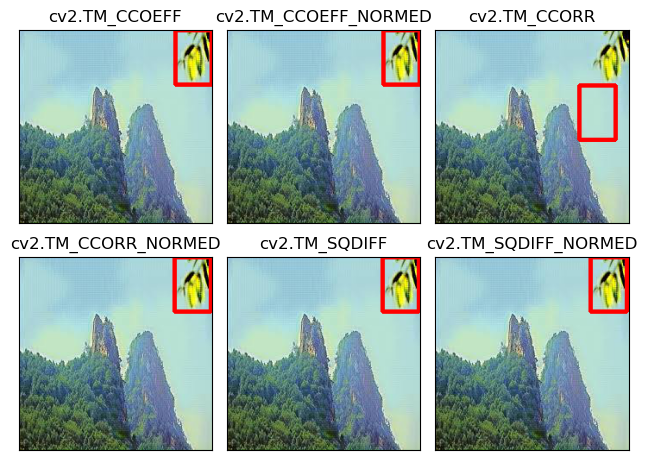

In [3]:
image = cv2.imread('hills.jpeg') # again reading it for having popular and universal name for template matching i.e image and template
template = cv2.imread('template.png')

h,w,_ = template.shape  # assigning no. rows as height to h and no. of cols as width as w and for safe '_' which is not used is no. of channels which is not used

template = cv2.resize(template, (w // 2, h // 2)) # resizing template to half of original height and width of the image
h,w,_ = template.shape


methods = [cv2.TM_CCOEFF, cv2.TM_CCOEFF_NORMED, cv2.TM_CCORR,
            cv2.TM_CCORR_NORMED, cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED] # applying all template matching methods

titles = ["cv2.TM_CCOEFF", "cv2.TM_CCOEFF_NORMED", "cv2.TM_CCORR",
            "cv2.TM_CCORR_NORMED", "cv2.TM_SQDIFF", "cv2.TM_SQDIFF_NORMED"] # mentioning tiltels for naming images while plotting
for i,method in enumerate(methods):
    image_2 = image.copy()
    result = cv2.matchTemplate(image_2,template,method) # template maching in built function in opencv
    min_val, max_val, min_loc, max_loc =  cv2.minMaxLoc(result)
    
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        location = min_loc
    else:
        location = max_loc

   
    bottom_right = (location[0] + w, location[1]+ h)
    cv2.rectangle(image_2,location,bottom_right, (0,0,255),3)

    image_2_rgb = cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB)

    cv2.imshow("Match", image_2)
    cv2.waitKey()
    cv2.destroyAllWindows()

    # Plotting with matplotlib
    plt.subplot(2, 3, i + 1)  # Create subplots in a 3x2 grid
    plt.imshow(image_2_rgb)
    plt.title(titles[i])
    plt.xticks([])  # Remove x ticks
    plt.yticks([])  # Remove y ticks

# Display all plots
plt.tight_layout()
plt.show()

    
    
   
